5.843333333333334 3.0540000000000003
0.6811222222222223 0.18675066666666668


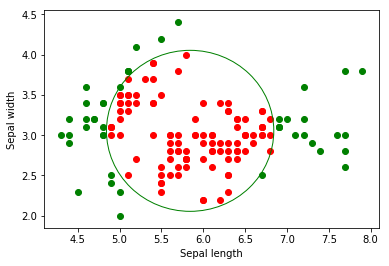

In [77]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

meanX = np.mean(X[:,0])
meanY = np.mean(X[:,1])

varX = np.var(X[:,0])
varY = np.var(X[:,1])
print(meanX, meanY)
print(varX, varY)

pointsIn = []
pointsOut = []

for i in range(0, len(X)):
    p = X[i]
    if ((p[0] - meanX)**2 + (p[1] - meanY)**2) <= 1:
        pointsIn.append(p)
    else:
        pointsOut.append(p)

pointsIn = np.array(pointsIn)
pointsOut = np.array(pointsOut)


fig = plt.gcf()
ax = fig.gca()
ax.add_artist(plt.Circle((meanX, meanY), 1, color='g', fill=False))
plt.scatter(pointsIn[:, 0], pointsIn[:, 1], color='r')
plt.scatter(pointsOut[:, 0], pointsOut[:, 1], color='g')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

macierz kowariancji: 
[[ 0.67743859 -0.03679649]
 [-0.03679649  0.18542456]]
Odległość
[[93.60074998]]
punktów w:  100  punktów poza: 198


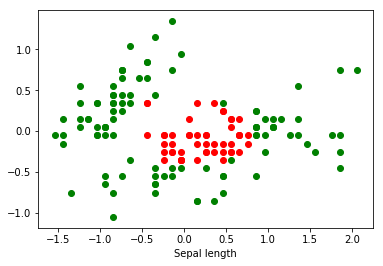

In [5]:
from sklearn.datasets import load_iris
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

X = np.array(X)

meanX = np.mean(X[:,0])
meanY = np.mean(X[:,1])

N = len(X[:,0])

mean = np.array([meanX, meanY])

# obliczamy macież kowariancji
cov = np.zeros(shape=(2, 2))
for i in range(1, N):
    cov += np.atleast_2d(X[i]-mean).T*(X[i]-mean)
cov = cov * (1/N)
cov = np.matrix(cov)
print('macierz kowariancji: ')
print(cov)


# obliczamy odległość
def mahalanobisDistance(p1, p2, sigma):
    p1 = np.atleast_2d(p1)
    p2 = np.atleast_2d(p2)
    return p1               \
            .dot(sigma.I)       \
            .dot(p2.T)      \
            [0,0]

print('Odległość')
p1 =  np.atleast_2d(X[1])
p2 =  np.atleast_2d(X[2])
print(p1.dot(cov.I).dot(p1.T))


pointsIn = []
pointsOut = []
for i in range(1, N):
    p = X[i] - mean
    if mahalanobisDistance(p, p, cov) <= 1:
        pointsIn.append(p)
    else:
        pointsOut.append(p)
        
        
pointsIn = np.array(pointsIn)
pointsOut = np.array(pointsOut)

print('punktów w: ', pointsIn.size, ' punktów poza:', pointsOut.size)

if pointsIn.size > 0:
    plt.scatter(pointsIn[:, 0], pointsIn[:, 1], color='r')
if pointsOut.size > 0:
    plt.scatter(pointsOut[:, 0], pointsOut[:, 1], color='g')
    
fig = plt.gcf()
ax = fig.gca()
trf = matplotlib.transforms.Affine2D(cov)
circle = plt.Circle((meanX, meanY), 1, color='g', fill=False)
ax.add_artist(circle)

plt.xlabel('Sepal length')

plt.show()